<a href="https://colab.research.google.com/github/LuchoValr/The-effect/blob/main/cap20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion discontinua con minimos cuadrados ordinarios con bandwidth y kernel weight aplicado, con heteroskedasticity-robust standard errors

In [1]:
#Primero graficamos para chequear si hay discontinuidad

In [2]:
!pip install causaldata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causaldata import gov_transfers

In [3]:
d = gov_transfers.load_pandas().data

In [4]:
#Cut at 0, and 15 places on either side
edges = np.linspace(-0.02, 0.02, 31)
d['Bins'] =pd.cut(d['Income_Centered'], bins = edges)

In [5]:
#Mean within bins
binned = d.groupby(['Bins']).agg('mean')

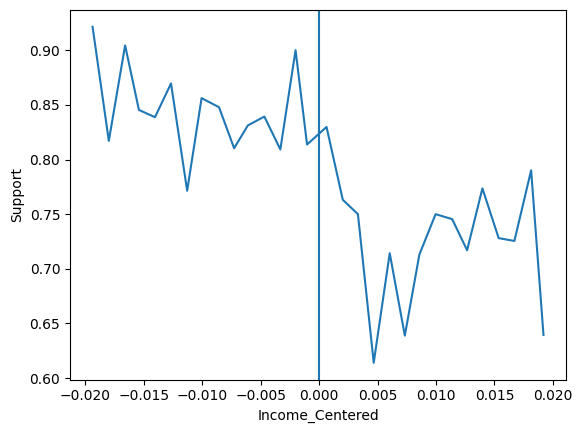

In [6]:
#And plot
sns.lineplot(x = binned['Income_Centered'],
             y = binned['Support'])
#Add vertical line at cutoff
plt.axvline(0, 0, 1)

In [7]:
#Realizando la regresion

In [8]:
import statsmodels.formula.api as smf

In [9]:
d = gov_transfers.load_pandas().data

In [10]:
#Run the polynomial model
m1 = smf.ols('''Support ~ Income_Centered*Participation + I(Income_Centered**2)*Participation''', d).fit()

In [11]:
#Create Kernel function
def kernel(x):
  #To start at a weight of 0 at x=0 and impose a bandwidth of 0.01, we need a "Slope" of -1/0.01=100 and to go in either direction use the absolute value
  w = 1 - 100*np.abs(x)
  #if further away than 0.01 the weight is 0, not negative
  w = np.maximum(0, w)
  return w

In [12]:
#Run the linear model with weights using wls
m2 = smf.wls('Support ~ Income_Centered*Participation', d, weights = kernel(d['Income_Centered'])).fit()

In [13]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Support   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     14.63
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           4.24e-14
Time:                        00:40:20   Log-Likelihood:                -496.76
No. Observations:                1948   AIC:                             1006.
Df Residuals:                    1942   BIC:                             1039.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.7690      0.034     22.321      0.000       0.701       0.837
Income_Centered                         -11.5666      7.777     -1.487      0.137     -26.819       3.686
Participation                             0.0929      0.046      2.025      0.043       0.003       0.183
Income_Centered:Participation            19.3000     10.445      1.848      0.065      -1.185      39.785
I(Income_Centered ** 2)                 562.2473    372.182      1.511      0.131    -167.672    1292.166
I(Income_Centered ** 2):Participation  -101.1025    500.196     -0.202      0.840   -1082.079     879.874
==============================================================================
Omnibus:                      335.257   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.668
Skew:                          -1.246   Prob(JB):                    4.32e-115
Kurtosis:                       3.532   Cond. No.                     9.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
m2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                Support   R-squared:                       0.041
Model:                            WLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     28.04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           9.52e-18
Time:                        00:40:20   Log-Likelihood:                   -inf
No. Observations:                1948   AIC:                               inf
Df Residuals:                    1944   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.8194      0.019     43.280      0.000       0.782       0.857
Income_Centered                 -23.6967      4.455     -5.320      0.000     -32.433     -14.960
Participation                     0.0335      0.026      1.292      0.196      -0.017       0.084
Income_Centered:Participation    26.5937      6.177      4.305      0.000      14.480      38.708
==============================================================================
Omnibus:                      854.936   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4673.816
Skew:                          -2.025   Prob(JB):                         0.00
Kurtosis:                       9.417   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""